In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading all climate datasets 

df_Temp = pd.read_csv('Temperature-2010-2025-Monthly.csv')
df_Wind = pd.read_csv('RHum-2010-2025-Monthly.csv')
df_Hum = pd.read_csv('Windspeed-2010-2025-Monthly.csv')
print(df_Temp.head())
print(df_Wind.head())
print(df_Hum.head())

  PARAMETER  YEAR   LAT     LON    JAN    FEB    MAR    APR    MAY    JUN  \
0       T2M  2010 -10.0  33.125  22.15  22.38  21.88  21.40  19.87  17.59   
1       T2M  2010 -10.0  33.750  23.68  23.83  23.42  23.11  21.59  19.23   
2       T2M  2010 -10.0  34.375  26.05  26.05  25.81  25.72  24.27  21.75   
3       T2M  2010 -10.0  35.000  21.18  21.24  21.02  20.38  19.56  17.63   
4       T2M  2010 -10.0  35.625  22.74  22.69  22.78  22.13  21.54  19.85   

     JUL    AUG    SEP    OCT    NOV    DEC    ANN  
0  17.48  18.57  22.37  25.63  26.43  22.61  21.52  
1  19.06  19.71  23.32  26.26  27.50  24.71  22.94  
2  21.60  22.02  25.37  27.92  29.00  27.21  25.22  
3  17.49  18.40  21.62  24.11  24.89  22.37  20.82  
4  19.71  20.50  23.73  26.09  27.06  24.10  22.74  
  PARAMETER  YEAR   LAT     LON    JAN    FEB    MAR    APR    MAY    JUN  \
0      RH2M  2010 -10.0  33.125  81.68  82.95  84.66  83.22  81.37  76.93   
1      RH2M  2010 -10.0  33.750  77.24  78.84  80.71  78.81  77.1

In [4]:
import geopandas as gpd
from shapely.geometry import point

#Loading district shapefile
districts = gpd.read_file("mwi_admbndp_admALL_nso_hotosm_itos_20230405.shp")

print(districts.head())



               ADM3_EN ADM3_PCODE ADM3_REF  ADM2_EN ADM2_PCODE   ADM1_EN  \
0       TA Mwabulambya    MW10101     None  Chitipa      MW101  Northern   
1  STA Bulambya Songwe    MW10102     None  Chitipa      MW101  Northern   
2       TA Mwenemisuku    MW10103     None  Chitipa      MW101  Northern   
3          STA Lwangwa    MW10104     None  Chitipa      MW101  Northern   
4        TA Mwenewenya    MW10105     None  Chitipa      MW101  Northern   

  ADM1_PCODE ADM0_EN ADM0_PCODE       date    validOn validTo  ORIG_FID  \
0        MW1  Malawi         MW 2023-03-29 2023-04-05     NaT         1   
1        MW1  Malawi         MW 2023-03-29 2023-04-05     NaT         2   
2        MW1  Malawi         MW 2023-03-29 2023-04-05     NaT         3   
3        MW1  Malawi         MW 2023-03-29 2023-04-05     NaT         4   
4        MW1  Malawi         MW 2023-03-29 2023-04-05     NaT         5   

                    geometry  
0  POINT (33.37071 -9.75857)  
1  POINT (33.29099 -9.56365)  

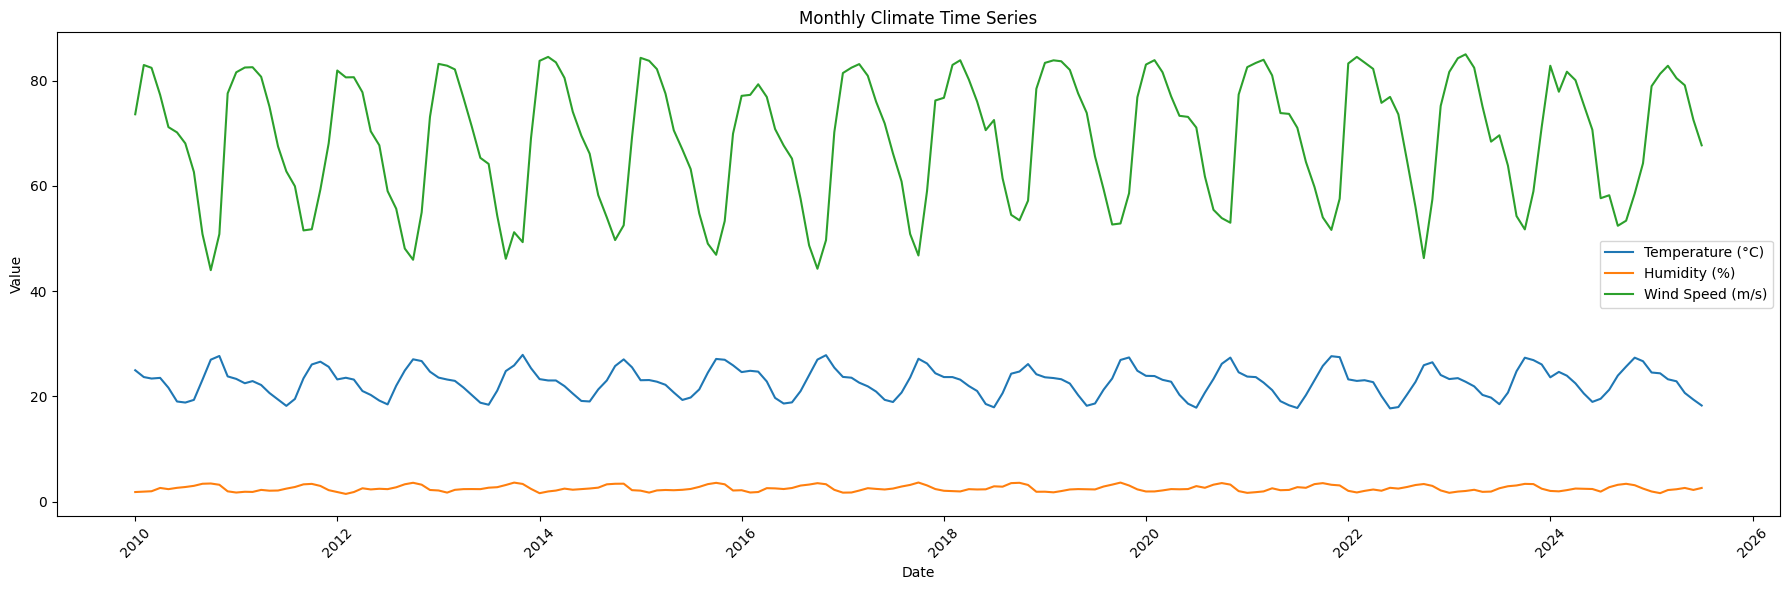

In [5]:
# Single melt function
def melt_monthly(df, value_name):
    return df.melt(
        id_vars=['PARAMETER', 'YEAR', 'LAT', 'LON'],
        value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],
        var_name='Month',
        value_name=value_name
    )

# Reshape all datasets
temp_long = melt_monthly(df_Temp, 'Temperature')
humidity_long = melt_monthly(df_Hum, 'Humidity')
wind_long = melt_monthly(df_Wind, 'WindSpeed')

# Merge datasets on YEAR, LAT, LON, Month
climate = temp_long.merge(humidity_long, on=['YEAR','LAT','LON','Month'])
climate = climate.merge(wind_long, on=['YEAR','LAT','LON','Month'])

# Map month abbreviations to numbers
month_map = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,
             'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
climate['Month_Num'] = climate['Month'].map(month_map)

# Create a datetime column for plotting
climate['date'] = pd.to_datetime(climate['YEAR'].astype(str) + '-' + climate['Month_Num'].astype(str) + '-01')

# Aggregate across locations if needed
monthly_climate = climate.groupby('date').mean(numeric_only=True).reset_index()

# Plot monthly time series
plt.figure(figsize=(18,6))
plt.plot(monthly_climate['date'], monthly_climate['Temperature'], label='Temperature (°C)')
plt.plot(monthly_climate['date'], monthly_climate['Humidity'], label='Humidity (%)')
plt.plot(monthly_climate['date'], monthly_climate['WindSpeed'], label='Wind Speed (m/s)')

plt.title('Monthly Climate Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

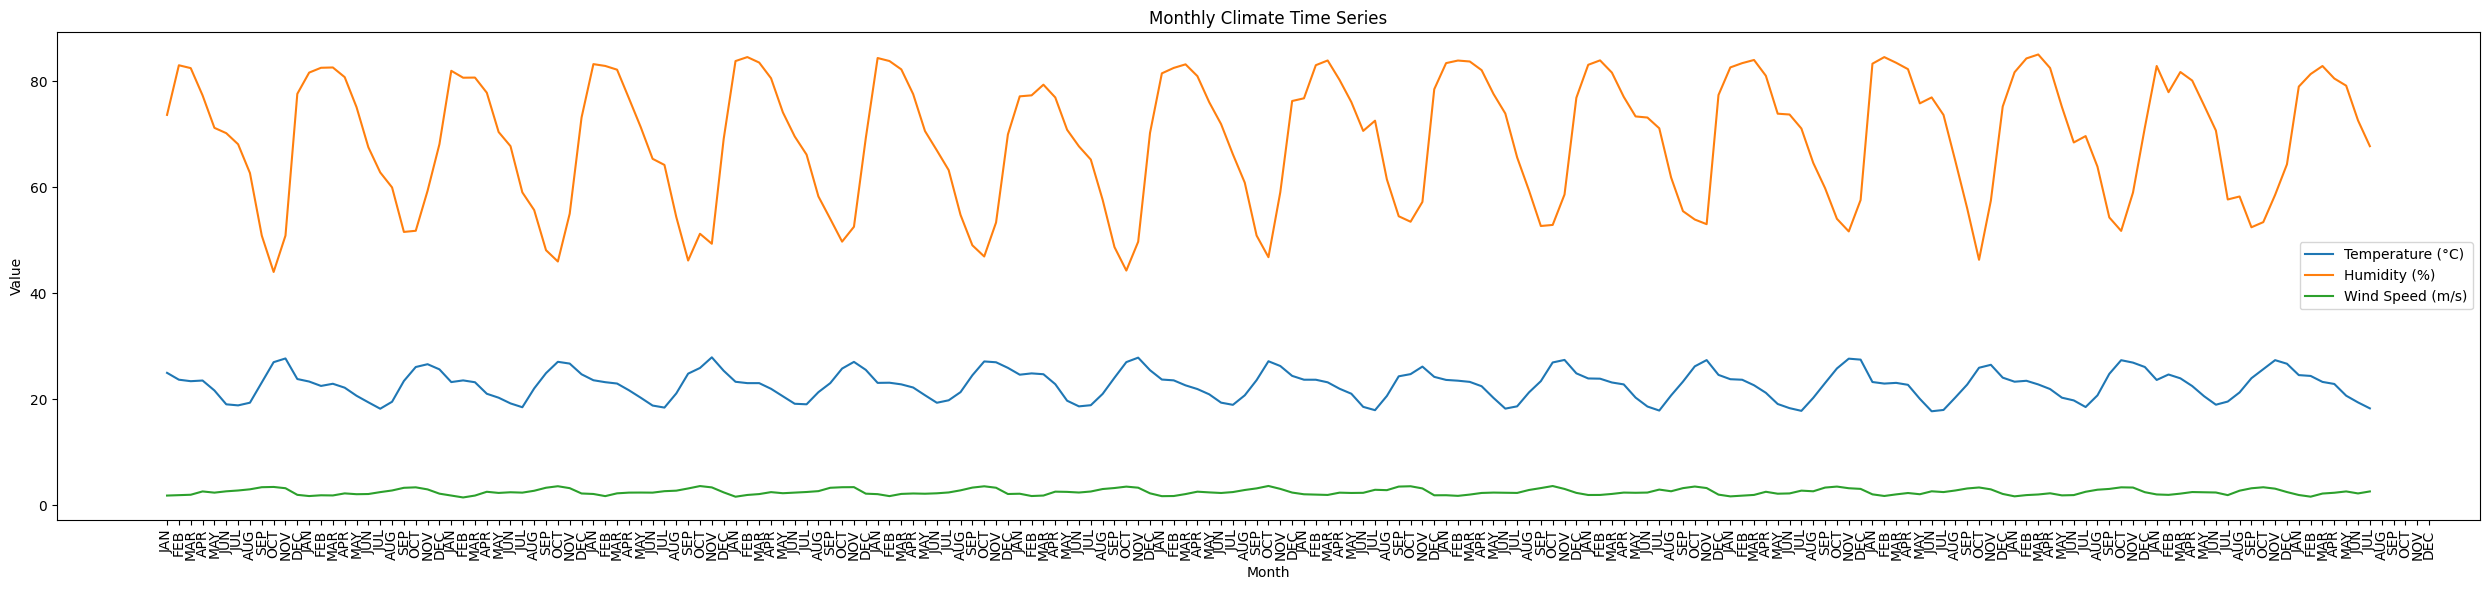

In [6]:

# Single melt function
def melt_monthly(df, value_name):
    return df.melt(
        id_vars=['PARAMETER', 'YEAR', 'LAT', 'LON'],
        value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],
        var_name='Month',
        value_name=value_name
    )

# Reshape datasets
temp_long = melt_monthly(df_Temp, 'Temperature')
humidity_long = melt_monthly(df_Hum, 'Humidity')
wind_long = melt_monthly(df_Wind, 'WindSpeed')

# Merge datasets
climate = temp_long.merge(humidity_long, on=['YEAR','LAT','LON','Month'])
climate = climate.merge(wind_long, on=['YEAR','LAT','LON','Month'])

# Map month abbreviations to numbers
month_map = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,
             'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
climate['Month_Num'] = climate['Month'].map(month_map)

# Create datetime
climate['date'] = pd.to_datetime(climate['YEAR'].astype(str) + '-' + climate['Month_Num'].astype(str) + '-01')

# Aggregate across locations
monthly_climate = climate.groupby(['YEAR','Month_Num','Month']).mean(numeric_only=True).reset_index()
monthly_climate = monthly_climate.sort_values(['YEAR','Month_Num']).reset_index(drop=True)

# Create x positions
x = range(len(monthly_climate))
months = monthly_climate['Month']
years = monthly_climate['YEAR']

# Plot
plt.figure(figsize=(25,6))
plt.plot(x, monthly_climate['Temperature'], label='Temperature (°C)')
plt.plot(x, monthly_climate['Humidity'], label='Humidity (%)')
plt.plot(x, monthly_climate['WindSpeed'], label='Wind Speed (m/s)')

# Month labels
plt.xticks(x, months, rotation=90)

# Year brackets / annotations
year_positions = {}
for i, y in enumerate(years):
    if y not in year_positions:
        year_positions[y] = [i, i]
    else:
        year_positions[y][1] = i

ax = plt.gca()
for y, (start, end) in year_positions.items():
    ax.annotate(
        str(y),
        xy=((start+end)/2, -0.05*monthly_climate[['Temperature','Humidity','WindSpeed']].to_numpy().max()),
        xycoords='data',
        ha='center',
        va='top',
        fontsize=12,
        fontweight='bold'
    )

plt.title('Monthly Climate Time Series')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


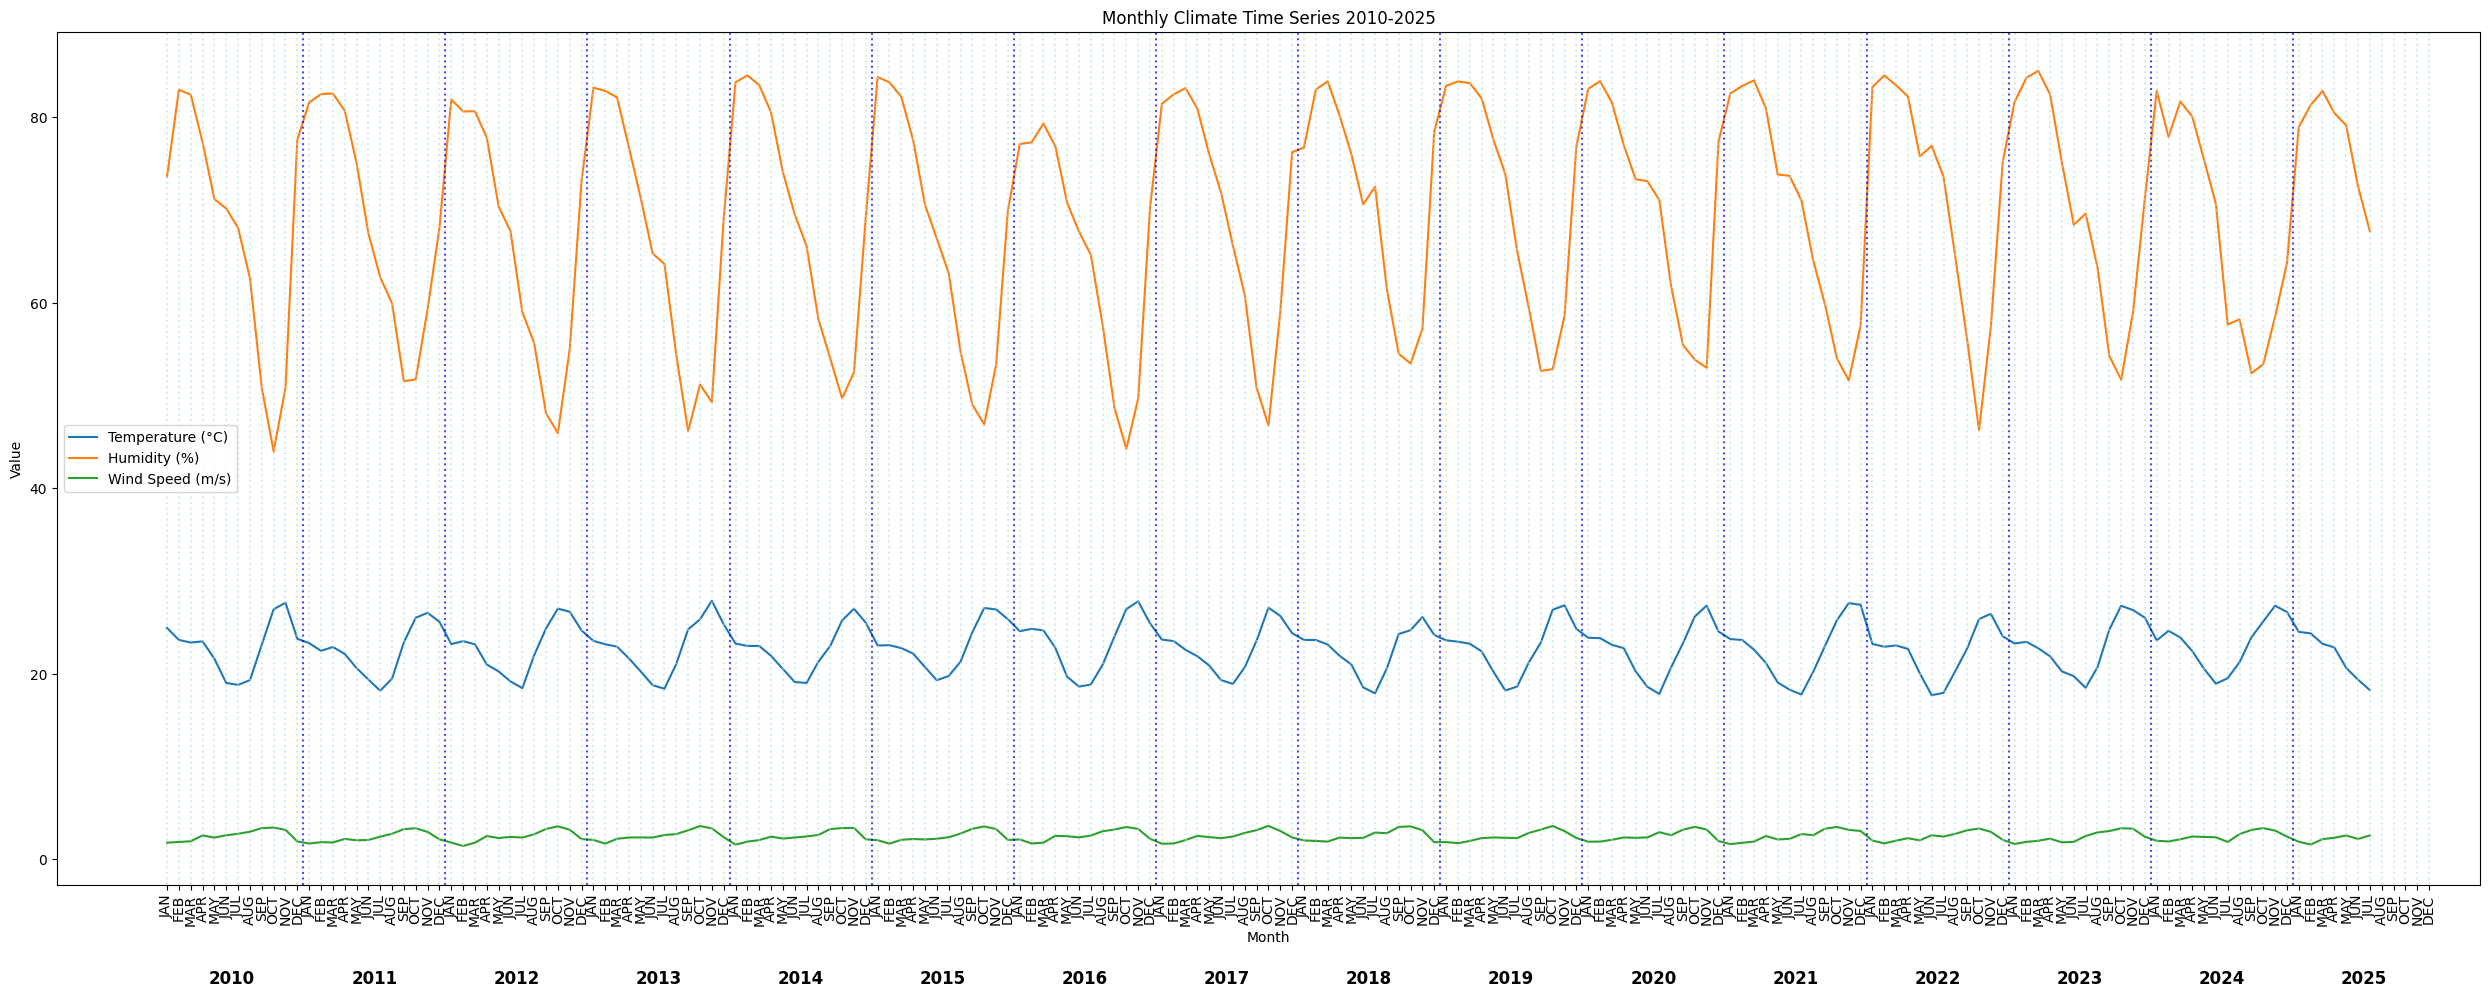

In [19]:

# Melt function
def melt_monthly(df, value_name):
    return df.melt(
        id_vars=['PARAMETER', 'YEAR', 'LAT', 'LON'],
        value_vars=['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],
        var_name='Month',
        value_name=value_name
    )

# Reshape datasets
temp_long = melt_monthly(df_Temp, 'Temperature')
humidity_long = melt_monthly(df_Hum, 'Humidity')
wind_long = melt_monthly(df_Wind, 'WindSpeed')

# Merge datasets
climate = temp_long.merge(humidity_long, on=['YEAR','LAT','LON','Month'])
climate = climate.merge(wind_long, on=['YEAR','LAT','LON','Month'])

# Map month abbreviations to numbers
month_map = {'JAN':1,'FEB':2,'MAR':3,'APR':4,'MAY':5,'JUN':6,
             'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12}
climate['Month_Num'] = climate['Month'].map(month_map)

# Aggregate across locations
monthly_climate = climate.groupby(['YEAR','Month_Num','Month']).mean(numeric_only=True).reset_index()
monthly_climate = monthly_climate.sort_values(['YEAR','Month_Num']).reset_index(drop=True)

# Create x positions
x = range(len(monthly_climate))
months = monthly_climate['Month']
years = monthly_climate['YEAR']

# Plot
plt.figure(figsize=(25,10))
plt.plot(x, monthly_climate['Temperature'], label='Temperature (°C)')
plt.plot(x, monthly_climate['Humidity'], label='Humidity (%)')
plt.plot(x, monthly_climate['WindSpeed'], label='Wind Speed (m/s)')

# Month labels
plt.xticks(x, months, rotation=90)

# Add vertical dotted grid lines for each month
for xi in x:
    plt.axvline(xi, color='lightblue', linestyle='dotted', alpha=0.5)

# Add year brackets & vertical lines
ax = plt.gca()
year_positions = {}
for i, y in enumerate(years):
    if y not in year_positions:
        year_positions[y] = [i, i]
    else:
        year_positions[y][1] = i
        
for y, (start, end) in year_positions.items():
    # Place year text below x-axis using axis coordinates
    ax.text(
        (start + end)/2, -0.1,  # -0.1 = slightly below x-axis
        str(y),
        ha='center', va='top',
        fontsize=12,
        fontweight='bold',
        transform=ax.get_xaxis_transform()
    )

    if start != 0:
        ax.axvline(start-0.5, color='blue', linestyle='dotted', alpha=0.7)

plt.title('Monthly Climate Time Series 2010-2025')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.savefig('Temp_monthly.png', dpi=300, bbox_inches = 'tight')
plt.show()


In [20]:
!pip install reverse_geocoder



In [21]:
import reverse_geocoder as rg

coords = list(zip(climate['LAT'], climate['LON']))  # note: reverse_geocoder expects (lat, lon)
results = rg.search(coords)

# Extract district names
climate['District'] = [res['admin2'] for res in results]  # admin1 was regional locations i.e central region/nothern region
print(climate.head())

Loading formatted geocoded file...
  PARAMETER_x  YEAR   LAT     LON Month  Temperature PARAMETER_y  Humidity  \
0         T2M  2010 -10.0  33.125   JAN        22.15        RH2M     81.68   
1         T2M  2010 -10.0  33.750   JAN        23.68        RH2M     77.24   
2         T2M  2010 -10.0  34.375   JAN        26.05        RH2M     68.67   
3         T2M  2010 -10.0  35.000   JAN        21.18        RH2M     87.53   
4         T2M  2010 -10.0  35.625   JAN        22.74        RH2M     89.02   

  PARAMETER  WindSpeed  Month_Num          District  
0      WS2M       1.25          1  Chitipa District  
1      WS2M       1.37          1  Karonga District  
2      WS2M       2.19          1                    
3      WS2M       0.66          1                    
4      WS2M       0.59          1                    


In [22]:
print(climate['District'].unique())

['Chitipa District' 'Karonga District' '' 'Rumphi District'
 'Mzimba District' 'Nkhata Bay District' 'Likoma District'
 'Kasungu District' 'Nkhotakota District' 'Mchinji District'
 'Dowa District' 'Salima District' 'Lilongwe District' 'Mangochi District'
 'Dedza District' 'Ntcheu District' 'Balaka District' 'Machinga District'
 'Mwanza District' 'Chiradzulu District' 'Phalombe District'
 'Thyolo District' 'Mulanje District' 'Chikwawa District'
 'Nsanje District']


In [23]:
print(climate[['LAT','LON','District']].head())

    LAT     LON          District
0 -10.0  33.125  Chitipa District
1 -10.0  33.750  Karonga District
2 -10.0  34.375                  
3 -10.0  35.000                  
4 -10.0  35.625                  


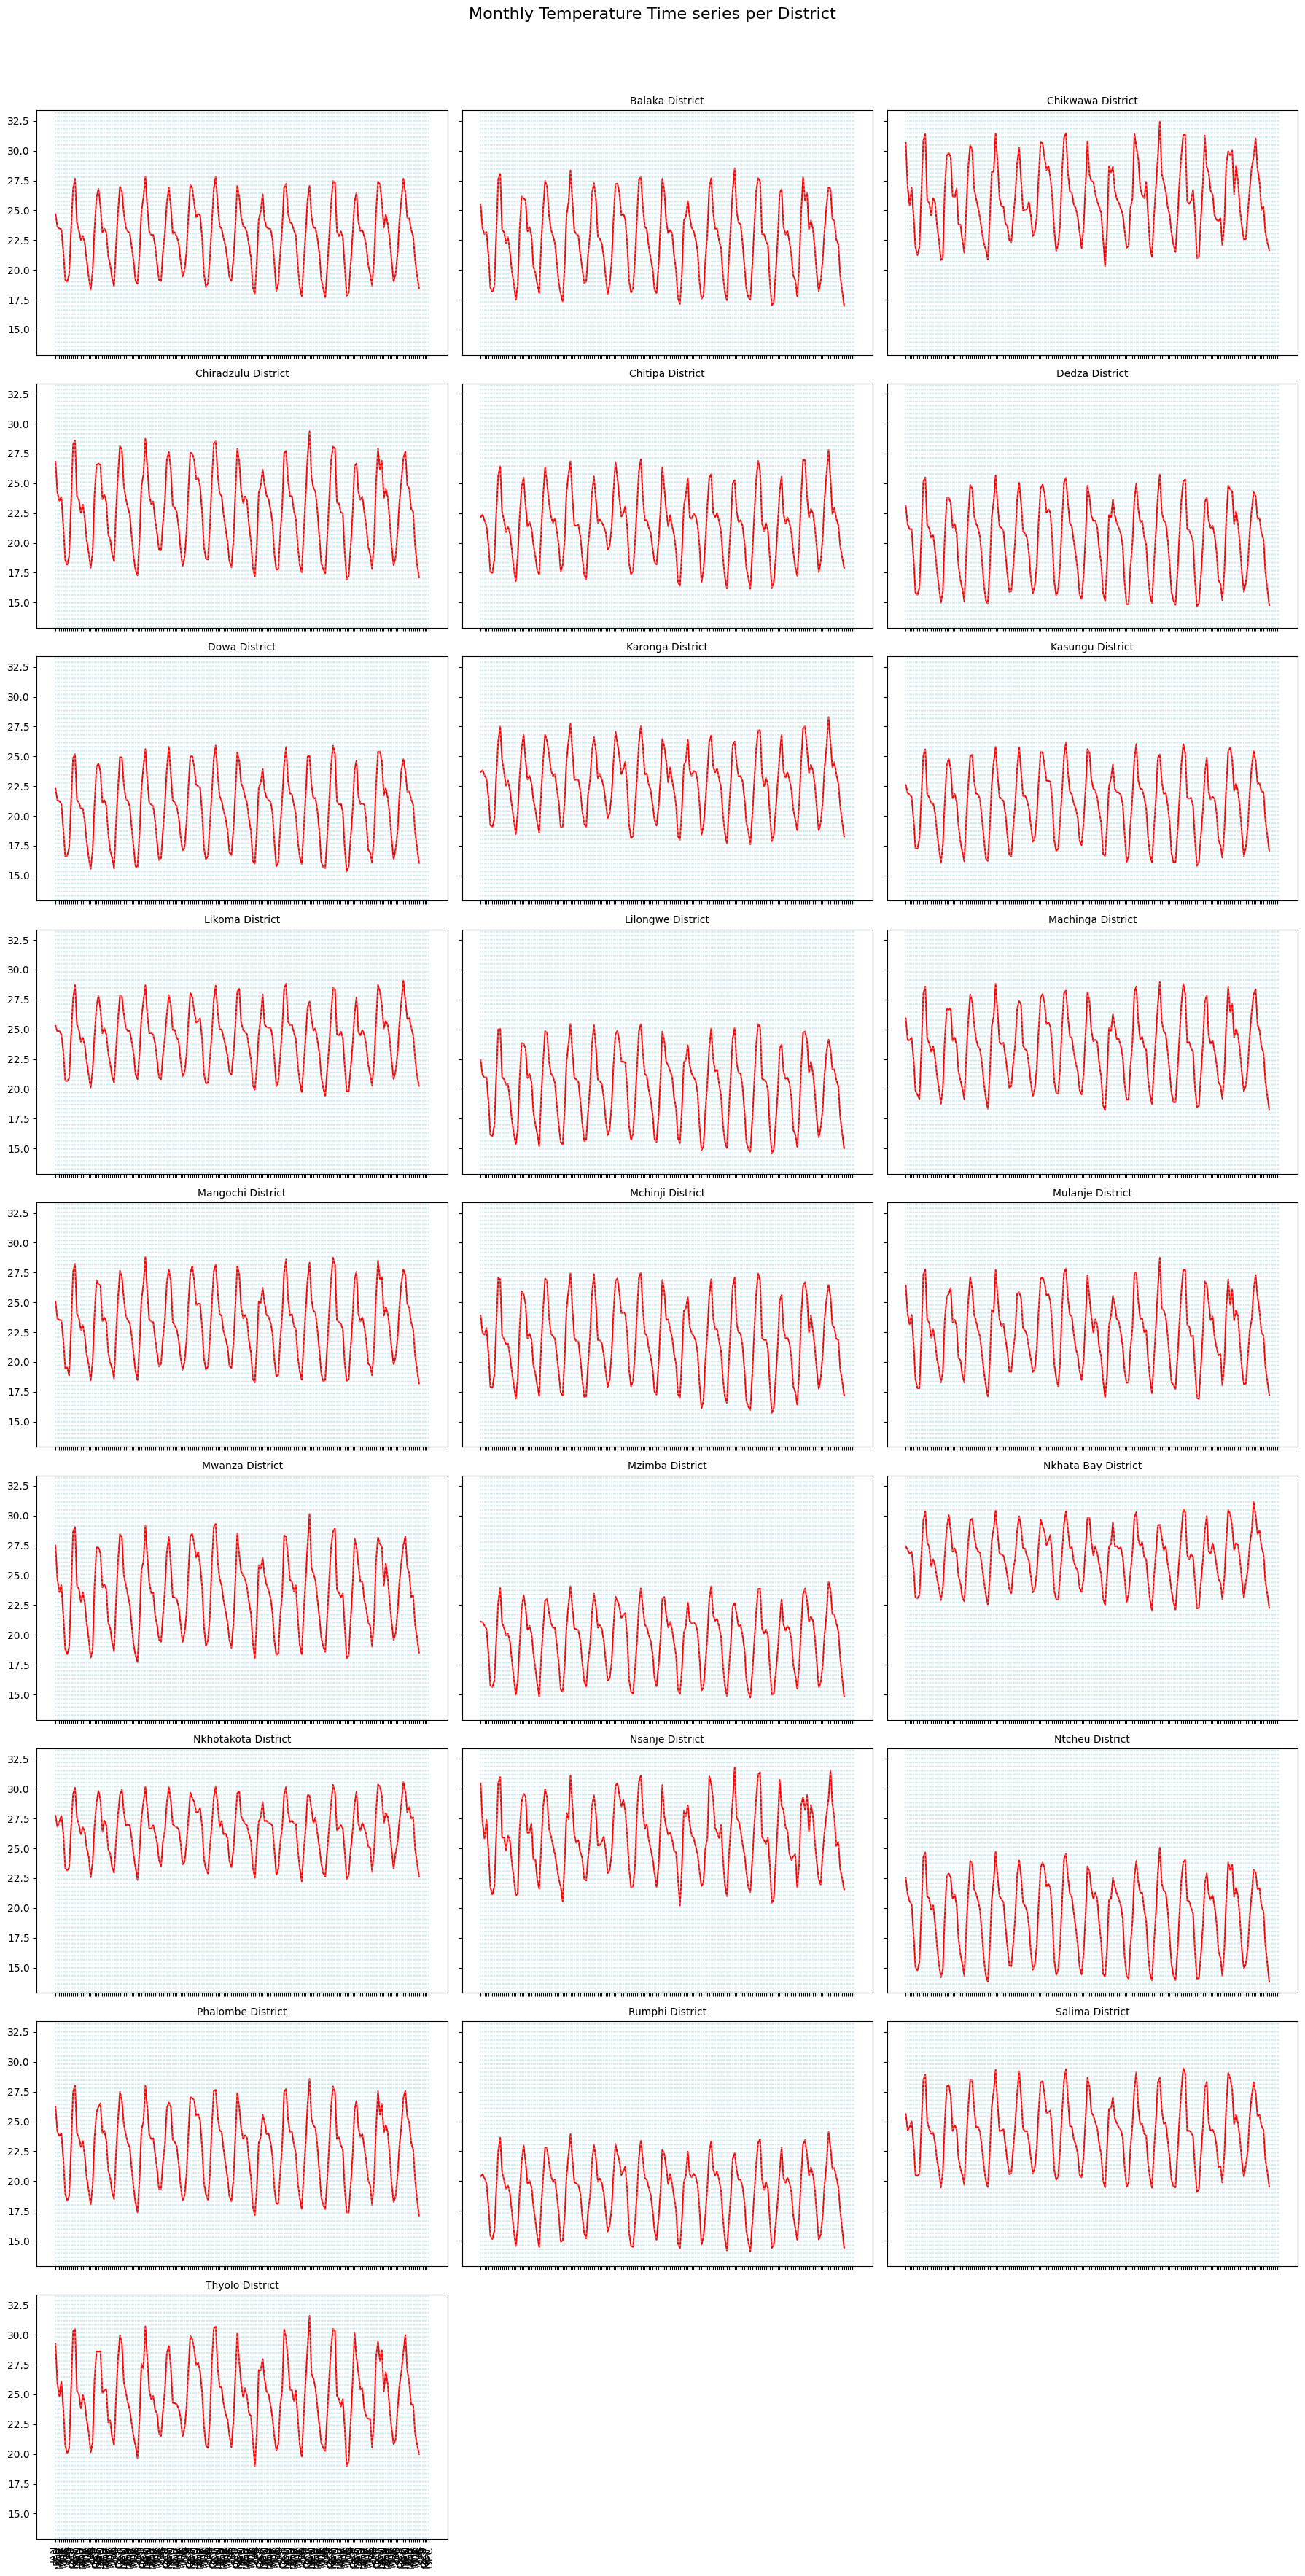

In [26]:
import math
# Aggregating climate data per district

district_climate = climate.groupby(['District', 'YEAR', 'Month_Num', 'Month']).mean(numeric_only=True).reset_index()
district_climate = district_climate.sort_values(['District', 'YEAR', 'Month_Num']).reset_index(drop=True)

# Get unique districts
districts = district_climate['District'].unique()
n_districts = len(districts)

# Decide grid layout (3 plots per row)
cols = 3
rows = math.ceil(n_districts / cols)

fig, axes = plt.subplots(rows, cols, figsize = (6*cols, 4*rows), sharey=True, sharex=True)
axes = axes.flatten()

for i, district in enumerate(districts):
    subset = district_climate[district_climate['District']== district]
    ax = axes[i]

    # x- axis positions
    x = range(len(subset))
    # plot Temp
    ax.plot(x, subset['Temperature'], color = 'red', label = 'Temperature (°C)')
    # Month labels but optional
    ax.set_xticks(x)
    ax.set_xticklabels(subset['Month'], rotation=90)

    # Title
    ax.set_title(district, fontsize = 10)

    # add vertical grid lines for each month
    for xi in x:
        ax.axvline(xi, color='lightblue', linestyle='dotted', alpha=0.5)

# remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Monthly Temperature Time series per District', fontsize = 16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

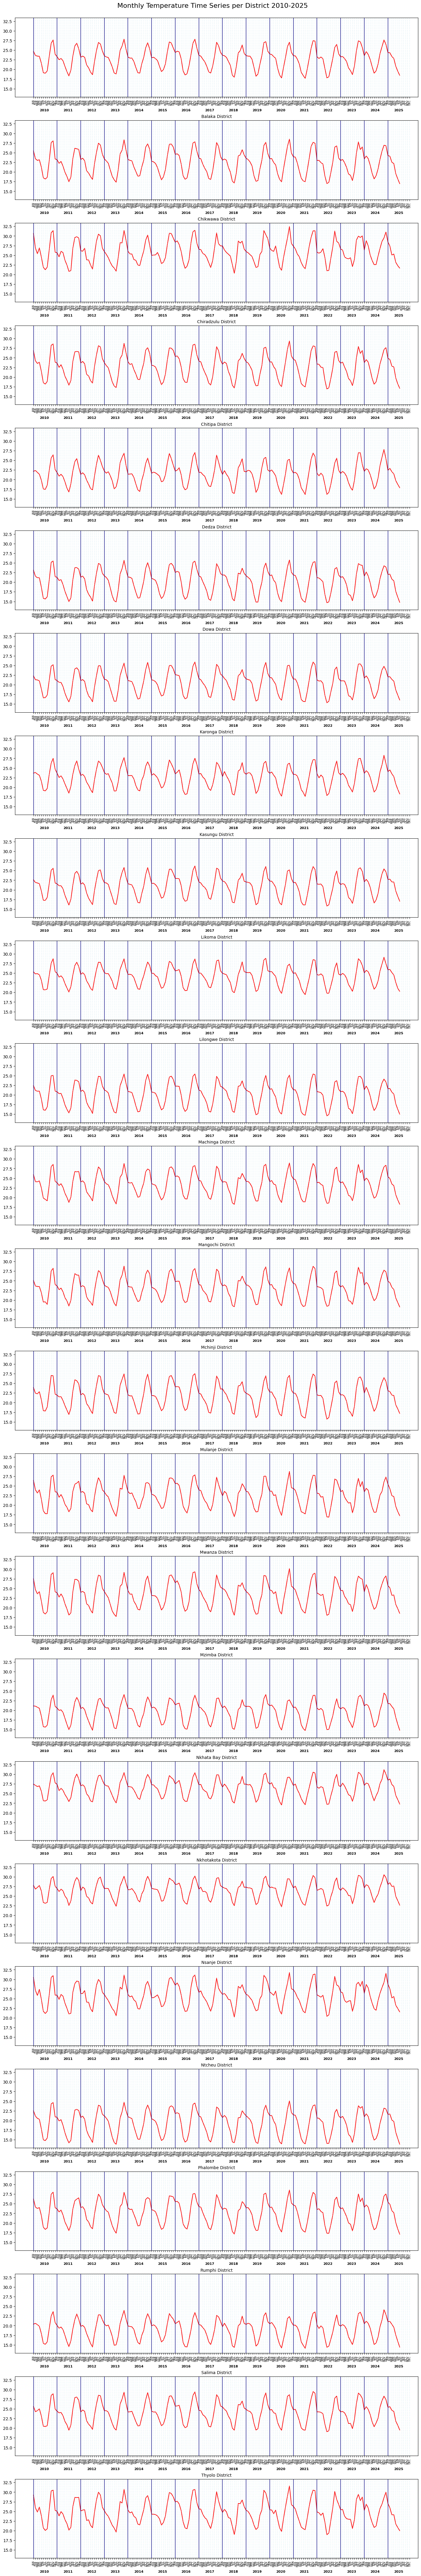

In [52]:
import math


# Aggregate climate data per district
district_climate = climate.groupby(['District', 'YEAR', 'Month_Num', 'Month']).mean(numeric_only=True).reset_index()
district_climate = district_climate.sort_values(['District', 'YEAR', 'Month_Num']).reset_index(drop=True)

# Get unique districts
districts = district_climate['District'].dropna().unique()
n_districts = len(districts)

# Grid layout (3 per row)
cols = 1
rows = math.ceil(n_districts / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 3.5*rows), sharey=True, sharex=False)
axes = axes.flatten()

for i, district in enumerate(districts):
    subset = district_climate[district_climate['District'] == district]
    ax = axes[i]

    # X-axis positions
    x = range(len(subset))
    
    # Plot temperature
    ax.plot(x, subset['Temperature'], color='red', label='Temperature (°C)')
    
    # Show months on ticks
    ax.set_xticks(x)
    ax.set_xticklabels(subset['Month'], rotation=90, fontsize=6)
    
    # Add vertical dotted lines for months
    for xi in x:
        ax.axvline(xi, color='lightblue', linestyle='dotted', alpha=0.4)
    
    # Title
    ax.set_title(district, fontsize=10)

    # Add year labels grouped under months
    years = subset['YEAR'].values
    year_positions = {}
    for j, y in enumerate(years):
        if y not in year_positions:
            year_positions[y] = [j, j]
        else:
            year_positions[y][1] = j
    
    for y, (start, end) in year_positions.items():
        ax.text(
            (start + end) / 2, -0.15,  # push year labels lower
            str(y),
            ha='center', va='top',
            fontsize=8, fontweight='bold',
            transform=ax.get_xaxis_transform()
        )
        ax.axvline(start, color='navy', linestyle='-', linewidth=1.5, alpha=0.7)

# Remove unused axes
for j in range(n_districts, len(axes)):
    fig.delaxes(axes[j])

# Super title
plt.suptitle('Monthly Temperature Time Series per District 2010-2025', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0,0, 1, 0.98])
plt.show()


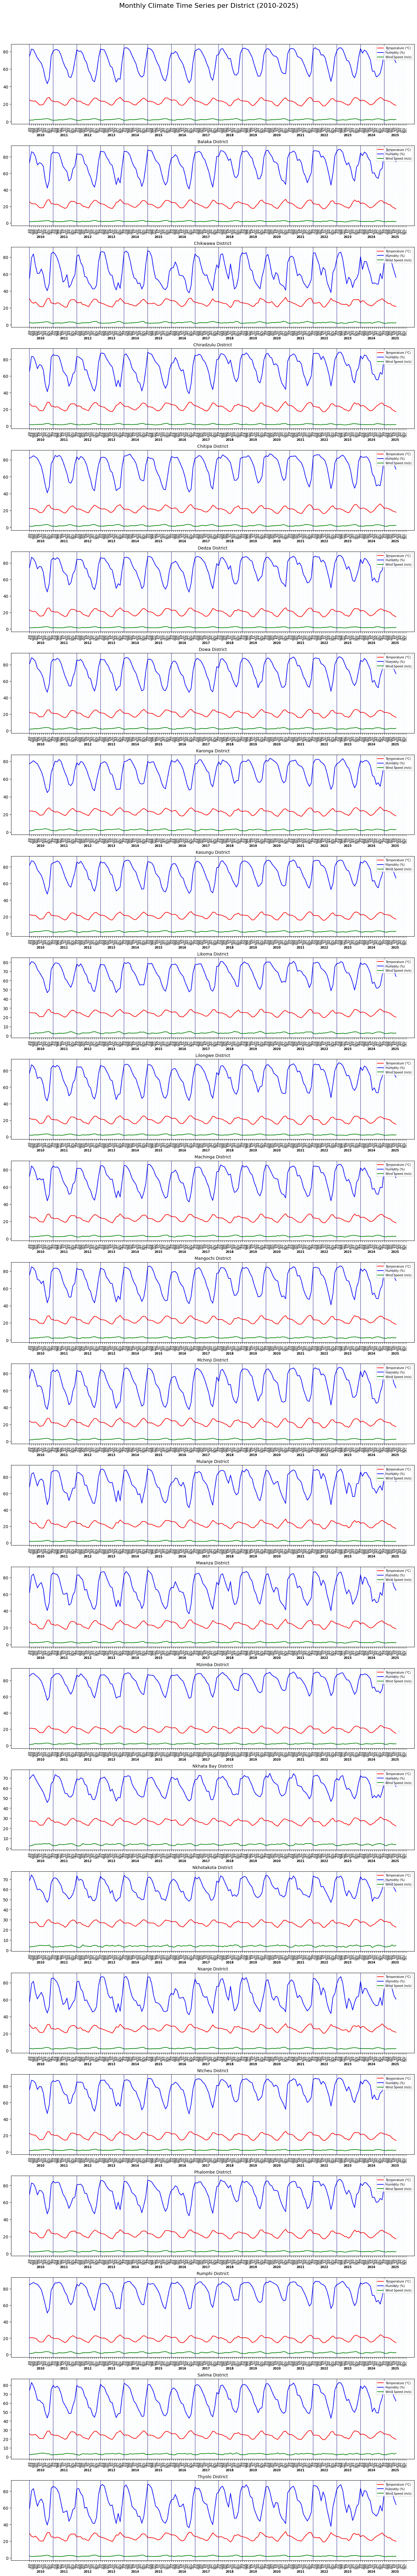

In [55]:
import math

# Aggregate climate data per district
district_climate = climate.groupby(['District', 'YEAR', 'Month_Num', 'Month']).mean(numeric_only=True).reset_index()
district_climate = district_climate.sort_values(['District', 'YEAR', 'Month_Num']).reset_index(drop=True)

# Get unique districts
districts = district_climate['District'].dropna().unique()
n_districts = len(districts)

# Grid layout (1 per row for readability, adjust cols if you want multiple per row)
cols = 1
rows = math.ceil(n_districts / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 3.5*rows), sharey=False, sharex=False)
axes = axes.flatten()

for i, district in enumerate(districts):
    subset = district_climate[district_climate['District'] == district]
    ax = axes[i]

    # X-axis positions
    x = range(len(subset))
    
    # Plot variables
    ax.plot(x, subset['Temperature'], color='red', label='Temperature (°C)')
    ax.plot(x, subset['Humidity'], color='blue', label='Humidity (%)')
    ax.plot(x, subset['WindSpeed'], color='green', label='Wind Speed (m/s)')
    
    # Show months on ticks
    ax.set_xticks(x)
    ax.set_xticklabels(subset['Month'], rotation=90, fontsize=6)
    
    # Add vertical dotted lines for months
    for xi in x:
        ax.axvline(xi, color='lightblue', linestyle='dotted', alpha=0.3)
    
    # Title
    ax.set_title(district, fontsize=10)

    # Add year labels grouped under months
    years = subset['YEAR'].values
    year_positions = {}
    for j, y in enumerate(years):
        if y not in year_positions:
            year_positions[y] = [j, j]
        else:
            year_positions[y][1] = j
    
    for y, (start, end) in year_positions.items():
        ax.text(
            (start + end) / 2, -0.12,  # position closer to months
            str(y),
            ha='center', va='top',
            fontsize=7, fontweight='bold',
            transform=ax.get_xaxis_transform()
        )
        ax.axvline(start, color='navy', linestyle='-', linewidth=1.2, alpha=0.6)

    # Legend inside each subplot
    ax.legend(fontsize=7, loc="upper right")

# Remove unused axes
for j in range(n_districts, len(axes)):
    fig.delaxes(axes[j])

# Super title
plt.suptitle('Monthly Climate Time Series per District (2010-2025)', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0,0, 1, 0.97])
plt.savefig('District_monthly_climate.png', dpi=300, bbox_inches='tight')
plt.show()


In [70]:
# Shapefile districts
print("Shapefile districts:")
print(sorted(malawi_map['ADM2_EN'].unique()))

# Climate data districts
print("\nClimate data districts:")
print(sorted(climate['District'].unique()))


Shapefile districts:
[]

Climate data districts:
['', 'Balaka District', 'Chikwawa District', 'Chiradzulu District', 'Chitipa District', 'Dedza District', 'Dowa District', 'Karonga District', 'Kasungu District', 'Likoma District', 'Lilongwe District', 'Machinga District', 'Mangochi District', 'Mchinji District', 'Mulanje District', 'Mwanza District', 'Mzimba District', 'Nkhata Bay District', 'Nkhotakota District', 'Nsanje District', 'Ntcheu District', 'Phalombe District', 'Rumphi District', 'Salima District', 'Thyolo District']


In [71]:
print(malawi_map.columns)

Index(['ADM3_EN', 'ADM3_PCODE', 'ADM3_REF', 'ADM2_EN', 'ADM2_PCODE', 'ADM1_EN',
       'ADM1_PCODE', 'ADM0_EN', 'ADM0_PCODE', 'date', 'validOn', 'validTo',
       'ORIG_FID', 'geometry', 'ADM2_EN_clean', 'District', 'Temperature',
       'District_clean'],
      dtype='object')


In [72]:
print(malawi_map[['ADM2_EN', 'geometry']].head(10))

Empty GeoDataFrame
Columns: [ADM2_EN, geometry]
Index: []


In [73]:
print(malawi_map[['ADM3_EN', 'geometry']].head(10))
print(malawi_map['ADM3_EN'].isna().sum())


Empty GeoDataFrame
Columns: [ADM3_EN, geometry]
Index: []
0
